## **Bank Churn Prediction Using Deep Learning**

- `Author:` Muhammad Akmal

- `Linkdin Account:` [Linkdin](https://www.linkedin.com/in/muhammad-akmal1995/)

- `Email:`[Email](akmal199511@gmail.com)

### **Importing Libraries**

In [2]:
# general purpose libraries
import pandas as pd
import numpy as np

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import Standaradscalar, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Import train test split
from sklearn.model_selection import train_test_split

# import cross validation score
from sklearn.model_selection import cross_val_score

# import Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Import Deep Learning Libararies
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

# import Earlystopping
from tensorflow.keras.callbacks import EarlyStopping

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
# Set the Seaborn Theme for the plots to be colorblind
sns.set_palette("colorblind")


### **Checking the version of the tensorflow**

In [6]:
# checking the version of the tensorflow
print("TensorFlow version:", tf.__version__)
# checking if the GPU is available for the tensorflow and activated
print("GPUs available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.0
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### **Loading the Datasets**

In [7]:
# loading the datasets

df = pd.read_csv("bank_churn.csv")

In [8]:
# previewing the first five rows of the train dataset
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


### **Getting Info about the Dataset**

#### **Column Description**
| Column Name        | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `id`               | A unique identifier.                                                        |
| `CustomerId`       | A unique identifier for each customer.                                      |
| `Surname`          | The surname of the customer.                                                |
| `CreditScore`      | The credit score of the customer.                                           |
| `Geography`        | The country where the customer resides.                                     |
| `Gender`           | The gender of the customer.                                                 |
| `Age`              | The age of the customer.                                                    |
| `Tenure`           | The number of years the customer has been with the bank.                    |
| `Balance`          | The account balance of the customer.                                        |
| `NumOfProducts`    | The number of bank products the customer uses (e.g., savings, credit card). |
| `IsActiveMember`   | Whether the customer is an active member or not.                            |
| `EstimatedSalary`  | The estimated salary of the customer.                                       |
| `Exited`           | Whether the customer has churned or not (Target Variable).                  |


In [9]:
# checking the number of rows and columns in the train dataset

print(f'The number of rows in dataset is {df.shape[0]} \n')

print(f'The number of columns in dataset is {df.shape[1]}')

The number of rows in dataset is 110023 

The number of columns in dataset is 13


In [ ]:
# checking the dataype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


----
- So we have `165034` rows and `14` columns in our dataset
- Out of 14 columns we have only `3` catagorical columns which are `Geography`, `CustomerId` and `Gender` remaining all have numerical values
----

### **Descriptive Statistics**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,110023.0,2.200450e+05,31761.048671,165034.00,1.925395e+05,220045.00,2.475505e+05,275056.00
CustomerId,110023.0,1.569210e+07,71684.990992,15565701.00,1.563286e+07,15690175.00,1.575693e+07,15815690.00
CreditScore,110023.0,6.565308e+02,80.315415,350.00,5.970000e+02,660.00,7.100000e+02,850.00
Age,110023.0,3.812221e+01,8.861550,18.00,3.200000e+01,37.00,4.200000e+01,92.00
Tenure,110023.0,4.996637e+00,2.806148,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,110023.0,5.533361e+04,62788.519675,0.00,0.000000e+00,0.00,1.201456e+05,250898.09
NumOfProducts,110023.0,1.553321e+00,0.544714,1.00,1.000000e+00,2.00,2.000000e+00,4.00
HasCrCard,110023.0,7.530425e-01,0.431244,0.00,1.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,110023.0,4.952328e-01,0.499980,0.00,0.000000e+00,0.00,1.000000e+00,1.00
EstimatedSalary,110023.0,1.123151e+05,50277.048244,11.58,7.444033e+04,117832.23,1.546314e+05,199992.48


----

- From the descriptive stats it is clear that on an average the credit score is `656` with a standard deviation from its mean is `80`. 
- And an avaerage age of our customers is `38` with an avaerge tennure a customer has an account with bank is 5 years.
- On an average the customers have `55478 $` balance in their accounts with a max balance of `250898 $`

---

In [12]:
# checking for missing values in the dataset

for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'df[{col}] has {df[col].isna().sum()} missing values')
    else:
        print(f"'{col}': missing values = {df[col].isna().sum()} \n")

'id': missing values = 0 

'CustomerId': missing values = 0 

'Surname': missing values = 0 

'CreditScore': missing values = 0 

'Geography': missing values = 0 

'Gender': missing values = 0 

'Age': missing values = 0 

'Tenure': missing values = 0 

'Balance': missing values = 0 

'NumOfProducts': missing values = 0 

'HasCrCard': missing values = 0 

'IsActiveMember': missing values = 0 

'EstimatedSalary': missing values = 0 



---

- Fron the above it is clear that there are no missing values in our dataset

---

### **Checking for the Duplicate Records:**

In [13]:
print('---------------------------------------------')
print(f"The duplicated rows in our dataset is: {df.duplicated().sum().any()}")
print('---------------------------------------------')


---------------------------------------------
The duplicated rows in our dataset is: False
---------------------------------------------


### **Exploratory Data Analysis**

In [14]:
# checking the number of unique values in CustomerId column
df['CustomerId'].nunique()

19698

---
- We have  `23221` unique CustomerId in our dataset
---

In [15]:
# checking the unique values in `Gender` column
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
# checking count of each gender in our dataframe
df.Gender.value_counts()

Gender
Male      61942
Female    48081
Name: count, dtype: int64

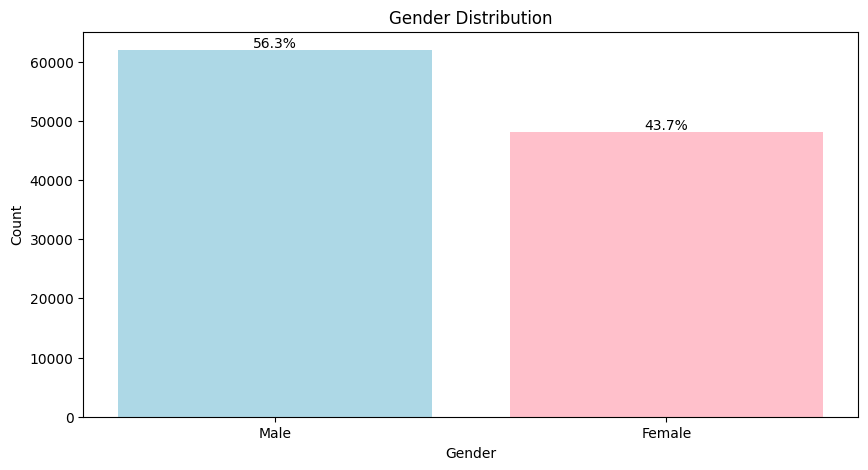

In [17]:
# plotting the count plot of the unique values in the `Gender` column

def bar_plot():
    """
    Function to create a bar plot for the 'Gender' column in the DataFrame.
    """
    # defining the plot size
    plt.figure(figsize=(10, 5))
    # plotting the count plot
    plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values, color=['lightblue', 'pink'])
    # Adding the percentage of each gender on top of the bars
    percentages = np.round(df['Gender'].value_counts().values / df.shape[0] * 100, 2)
    # Looping through the percentages and adding them to the plot	
    for i, value in enumerate(percentages):
        plt.text(i, df['Gender'].value_counts().values[i] + 500, f"{value}%", ha='center', fontsize=10)
    # Adding the title and labels
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Gender Distribution')
    plt.show()

# calling the function to plot the bar plot
bar_plot()


---

- From the above results it is clear that we have `93150` male customers and `71884` female customers in our dataset

---

In [18]:
# checking the unique values in the `Geography` column
df.Geography.unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [19]:
# checking the count of each unique value in the `Geography` column
df.Geography.value_counts()

Geography
France     63171
Spain      23913
Germany    22939
Name: count, dtype: int64

### **Pie Chart**

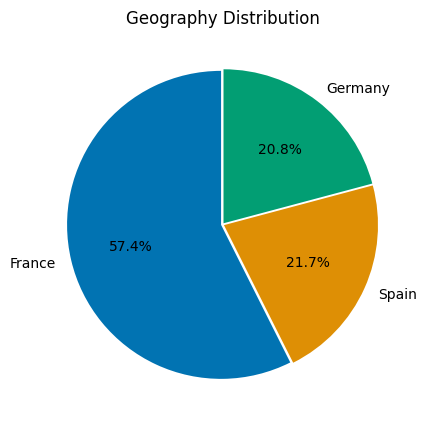

In [20]:
# plotting the pie chart for the unique values in the `Geography` column

def pie_chart():
    """
    Function to create a pie chart for the 'Geography' column in the DataFrame.
    """
    # defining the plot size
    plt.figure(figsize=(10, 5))
    # plotting the pie chart
    plt.pie(df['Geography'].value_counts(), labels=df['Geography'].value_counts().index, autopct='%1.1f%%', startangle=90,
             explode=[0.01] * len(df['Geography'].value_counts()))
    # Adding the title
    plt.title('Geography Distribution')
    plt.show()

# calling the function to plot the pie chart
pie_chart()

---
- From the above results it is clear that majority of the customers are from `France` followed by `Spain` and `Germany` which almost have equal percentage of 21%.
- The value count of the customer in our dataframe is:
  - `France`: 101348
  - `Spain`: 101342
  - `Germany`: 101329
---

In [ ]:
# checking the number of unique values in credit score column
df.CreditScore.nunique()

457

In [ ]:
# checking stats for the credit score column
df.CreditScore.describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

In [ ]:
# stats for the credit score column by gender
df.groupby('Gender')['CreditScore'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
Gender,,,,,
Female,656.243726,659.0,80.502500,350,850
Male,656.616930,660.0,79.793996,350,850


---
- There is not much difference in the stats of credit score of the male and female customers.

---

### **Histogram**

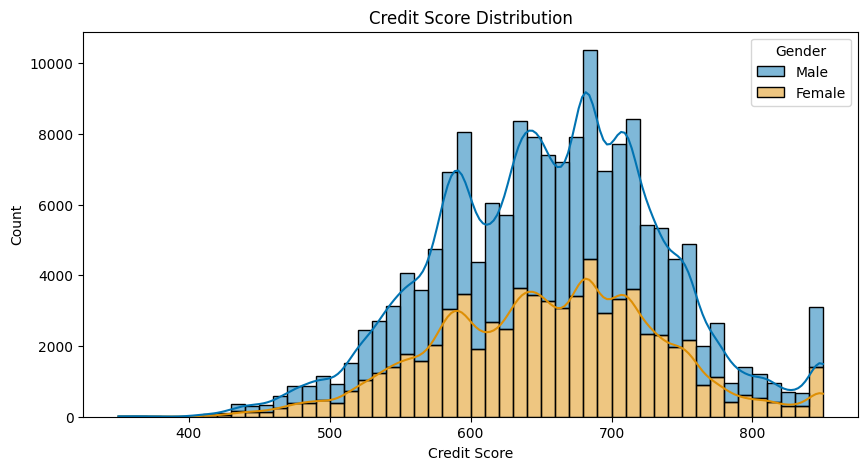

In [ ]:
# credit score distribution plot

def credit_score_distribution():
    """
    Function to create a histogram for the 'CreditScore' column in the DataFrame.
    """
    # defining the plot size
    plt.figure(figsize=(10, 5))
    # plotting the histogram
    sns.histplot(data=df, x='CreditScore', bins=50, edgecolor='black', hue='Gender', multiple='stack', kde=True)
    # Adding the title and labels
    plt.xlabel('Credit Score')
    plt.ylabel('Count')
    plt.title('Credit Score Distribution')
    plt.show()

# calling the function to plot the credit score distribution
credit_score_distribution()

---
- The above histogram represents that the credit score is right skewed for both male and female customers.

---

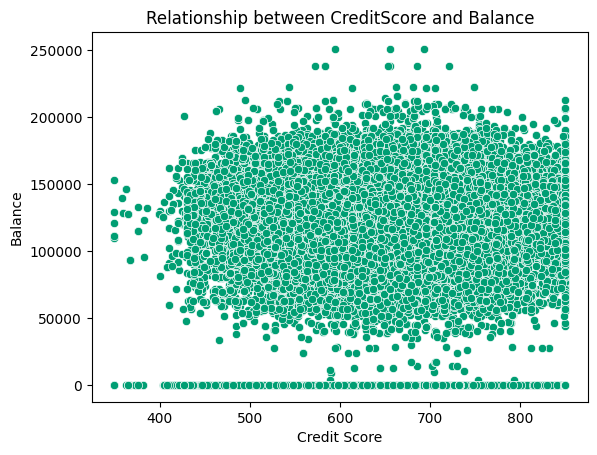

In [ ]:
# checking the relationship between the `CreditScore` and `Balance` columns

def plot_credit_balance_relationship(data):
    """
    Function to plot the relationship between CreditScore and Balance.
    """
    sns.scatterplot(data=data, x='CreditScore', y='Balance', color='#009E73')
    plt.title('Relationship between CreditScore and Balance')
    plt.xlabel('Credit Score')
    plt.ylabel('Balance')
    plt.show()

# Call the function
plot_credit_balance_relationship(df)

In [ ]:
# checking the correlation between the `CreditScore` and `Balance` columns
df[['CreditScore', 'Balance']].corr()

,CreditScore,Balance
CreditScore,1.000000,0.006973
Balance,0.006973,1.000000


---
- From the both scatter plot and correlation matrix we can say that there is a weak positive correlation between the `CreditScore` and `Balance` columns.

---

### **Heatmap**

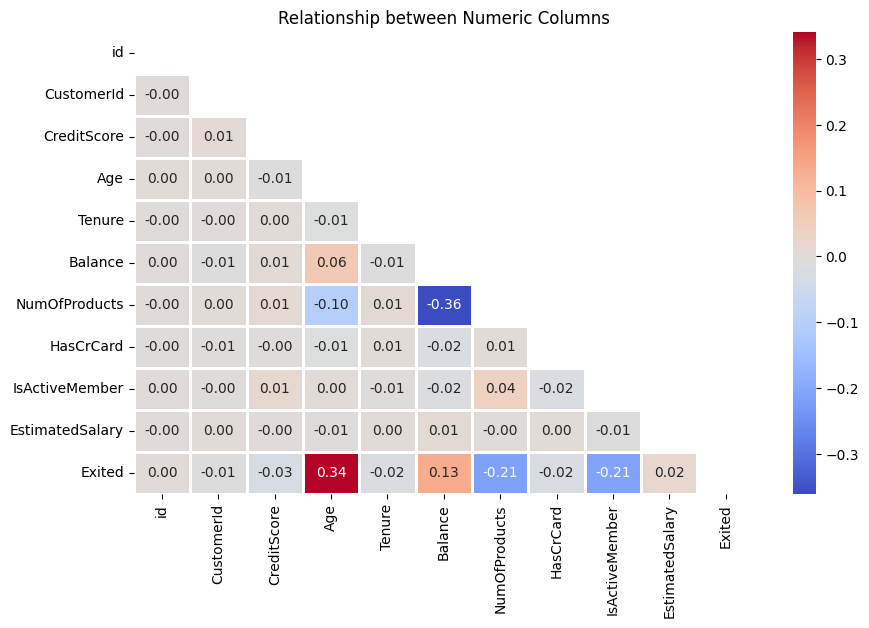

In [ ]:
# checking the relationship between the numeric columns in the dataset

def plot_relationship():
    """
    Function to plot the relationship between numeric columns in the dataset.
    """
    # defining the plot size
    plt.figure(figsize=(10, 6))	
    # plotting the heatmap
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, mask=np.triu(df.corr(numeric_only=True)))
    # Adding the title
    plt.title('Relationship between Numeric Columns')
    plt.show()

# Call the function
plot_relationship()

---
- Not a signle numeric column falls under the correlation threshold of above 0.5.
- So, that means there is no strong relationship between the numeric columns in the dataset.

----

In [ ]:
# checking the unique values in the `NumOfProducts` column
df.NumOfProducts.unique()


array([2, 1, 3, 4], dtype=int64)

In [ ]:
# checking the unique values count in the `NumOfProducts` column
df.NumOfProducts.value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [ ]:
# grouping the `NumOfProducts` column by `Gender`

df.groupby('Gender')['NumOfProducts'].value_counts()

Gender  NumOfProducts
Female  1                35341
        2                34674
        3                 1593
        4                  276
Male    2                49617
        1                42033
        3                 1301
        4                  199
Name: count, dtype: int64

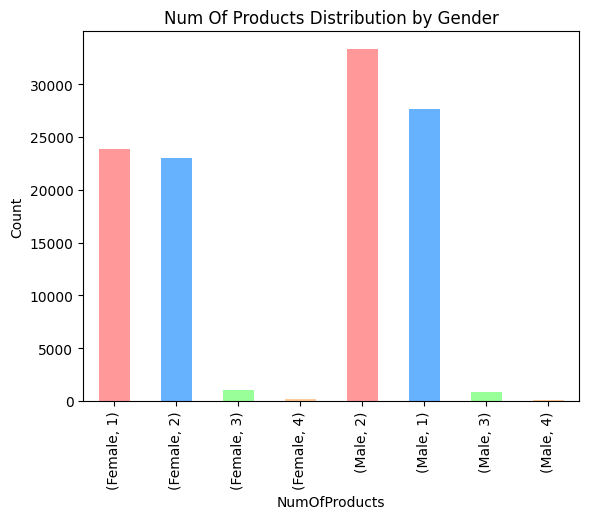

In [22]:
# plotting the count of `NumOfProducts` column by `Gender`
df.groupby('Gender')['NumOfProducts'].value_counts().plot(kind='bar',
                                                           color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Adding the title and labels
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('Num Of Products Distribution by Gender')
plt.show()

---
- Majority of the female has onecard in constrast to this maximum no. of males has 2 cards.
---

In [23]:
# checking the unique values in the `HasCrCard` column
df.HasCrCard.unique()

array([0., 1.])

In [24]:
# checking the count of each unique value in the `HasCrCard` column
df.HasCrCard.value_counts()

HasCrCard
1.0    82852
0.0    27171
Name: count, dtype: int64

In [25]:
# HasCrCard relationship with Gender

df.groupby('Gender')['HasCrCard'].value_counts()

Gender  HasCrCard
Female  1.0          36117
        0.0          11964
Male    1.0          46735
        0.0          15207
Name: count, dtype: int64

----
- As we can see that `HasCrCard` is a binary column.
- The female customers has less `HasCrCard` than the male customers.
---

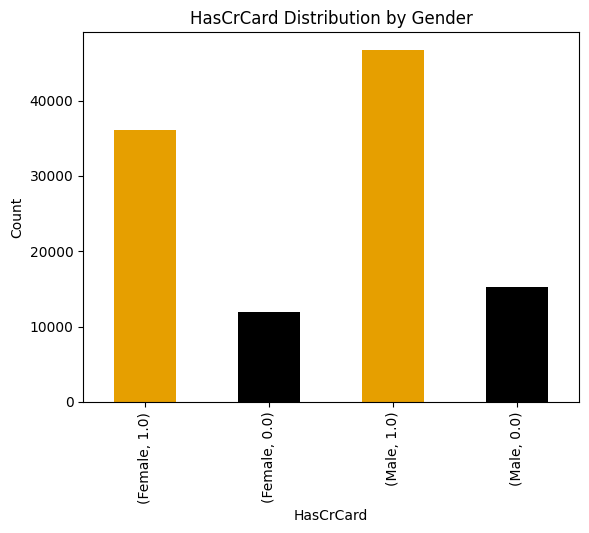

In [29]:
# plotting the count of `HasCrCard` column by `Gender`
df.groupby('Gender')['HasCrCard'].value_counts().plot(kind='bar', color=['#E69F00', '#000000'])
# Adding the title and labels
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('HasCrCard Distribution by Gender')
plt.show()

In [31]:
# checking the unique values in the `IsActiveMember` column
df.IsActiveMember.unique()

array([1., 0.])

In [32]:
# checking the count of each unique value in the `IsActiveMember` column
df.IsActiveMember.value_counts()

IsActiveMember
0.0    55536
1.0    54487
Name: count, dtype: int64

----
- As we can see that `IsActiveMember` is a binary column.
- The is no relationship between the `IsActiveMember` of 0 and 1.
----

### **Boxplot of Numeric Columns**

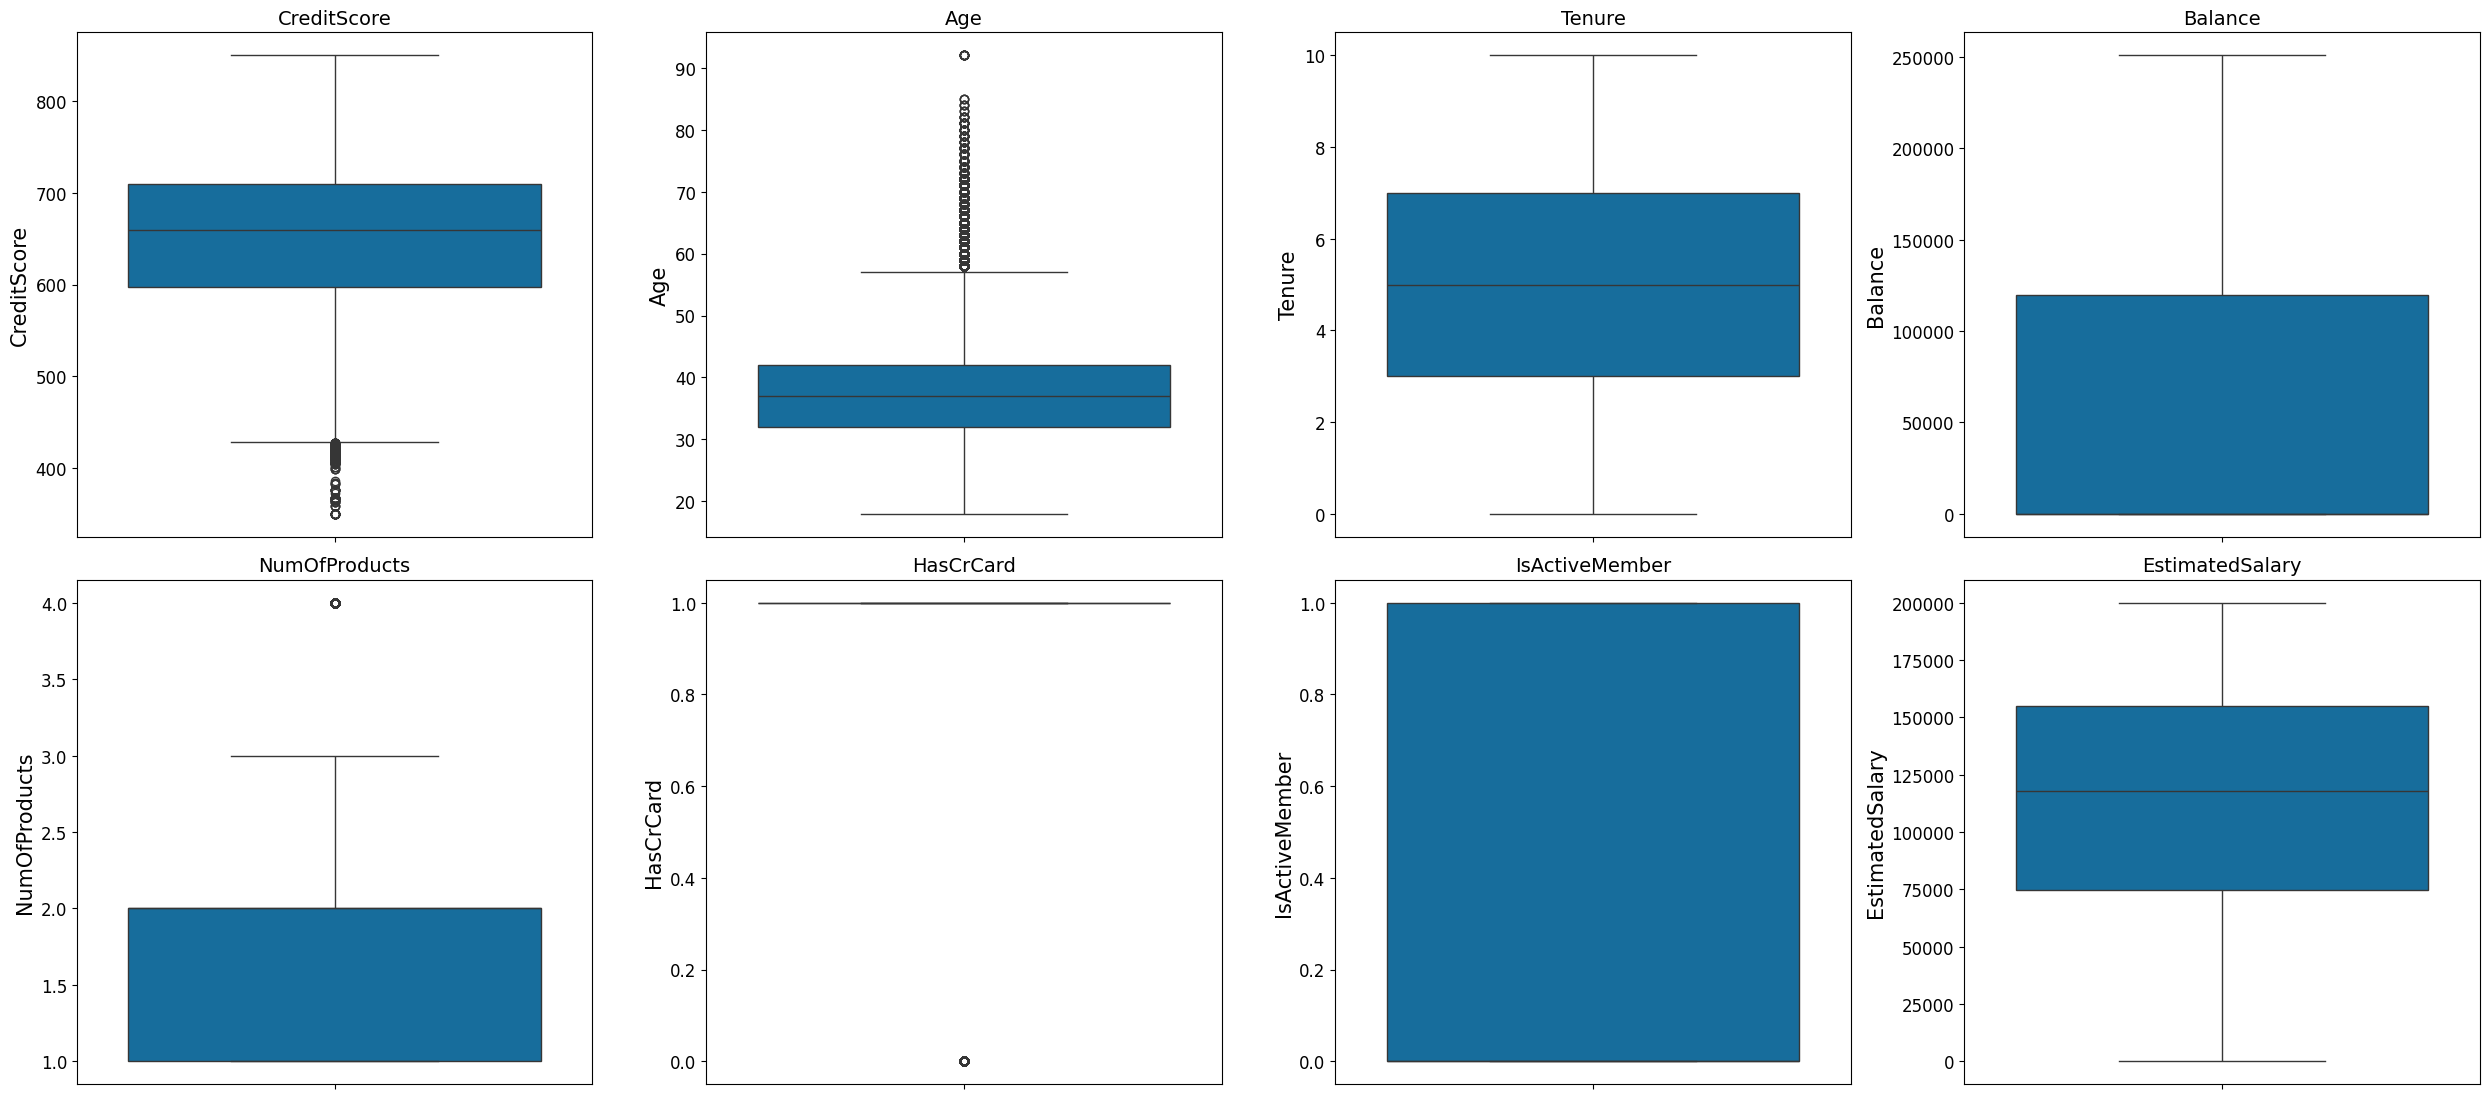

In [32]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# defining the figure size
plt.figure(figsize=(25, 22))

# making for loop for subplots
for col in range(len(numeric_cols.columns)):
    # defining subplot
    plt.subplot(4, 4, col+1)
    # plotting boxplot
    sns.boxplot(y=df[numeric_cols.columns[col]])
    # Increase title font size
    plt.title(numeric_cols.columns[col], fontsize=14)  
    # Increase Y-axis label font size
    plt.ylabel(numeric_cols.columns[col], fontsize=15)
     # Increase tick size
    plt.tick_params(axis='both', which='major', labelsize=12) 

# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

----
- As from the boxplot we can see that `CreditScore` and `Age` column.

----

### **Histogram of Numeric Columns**

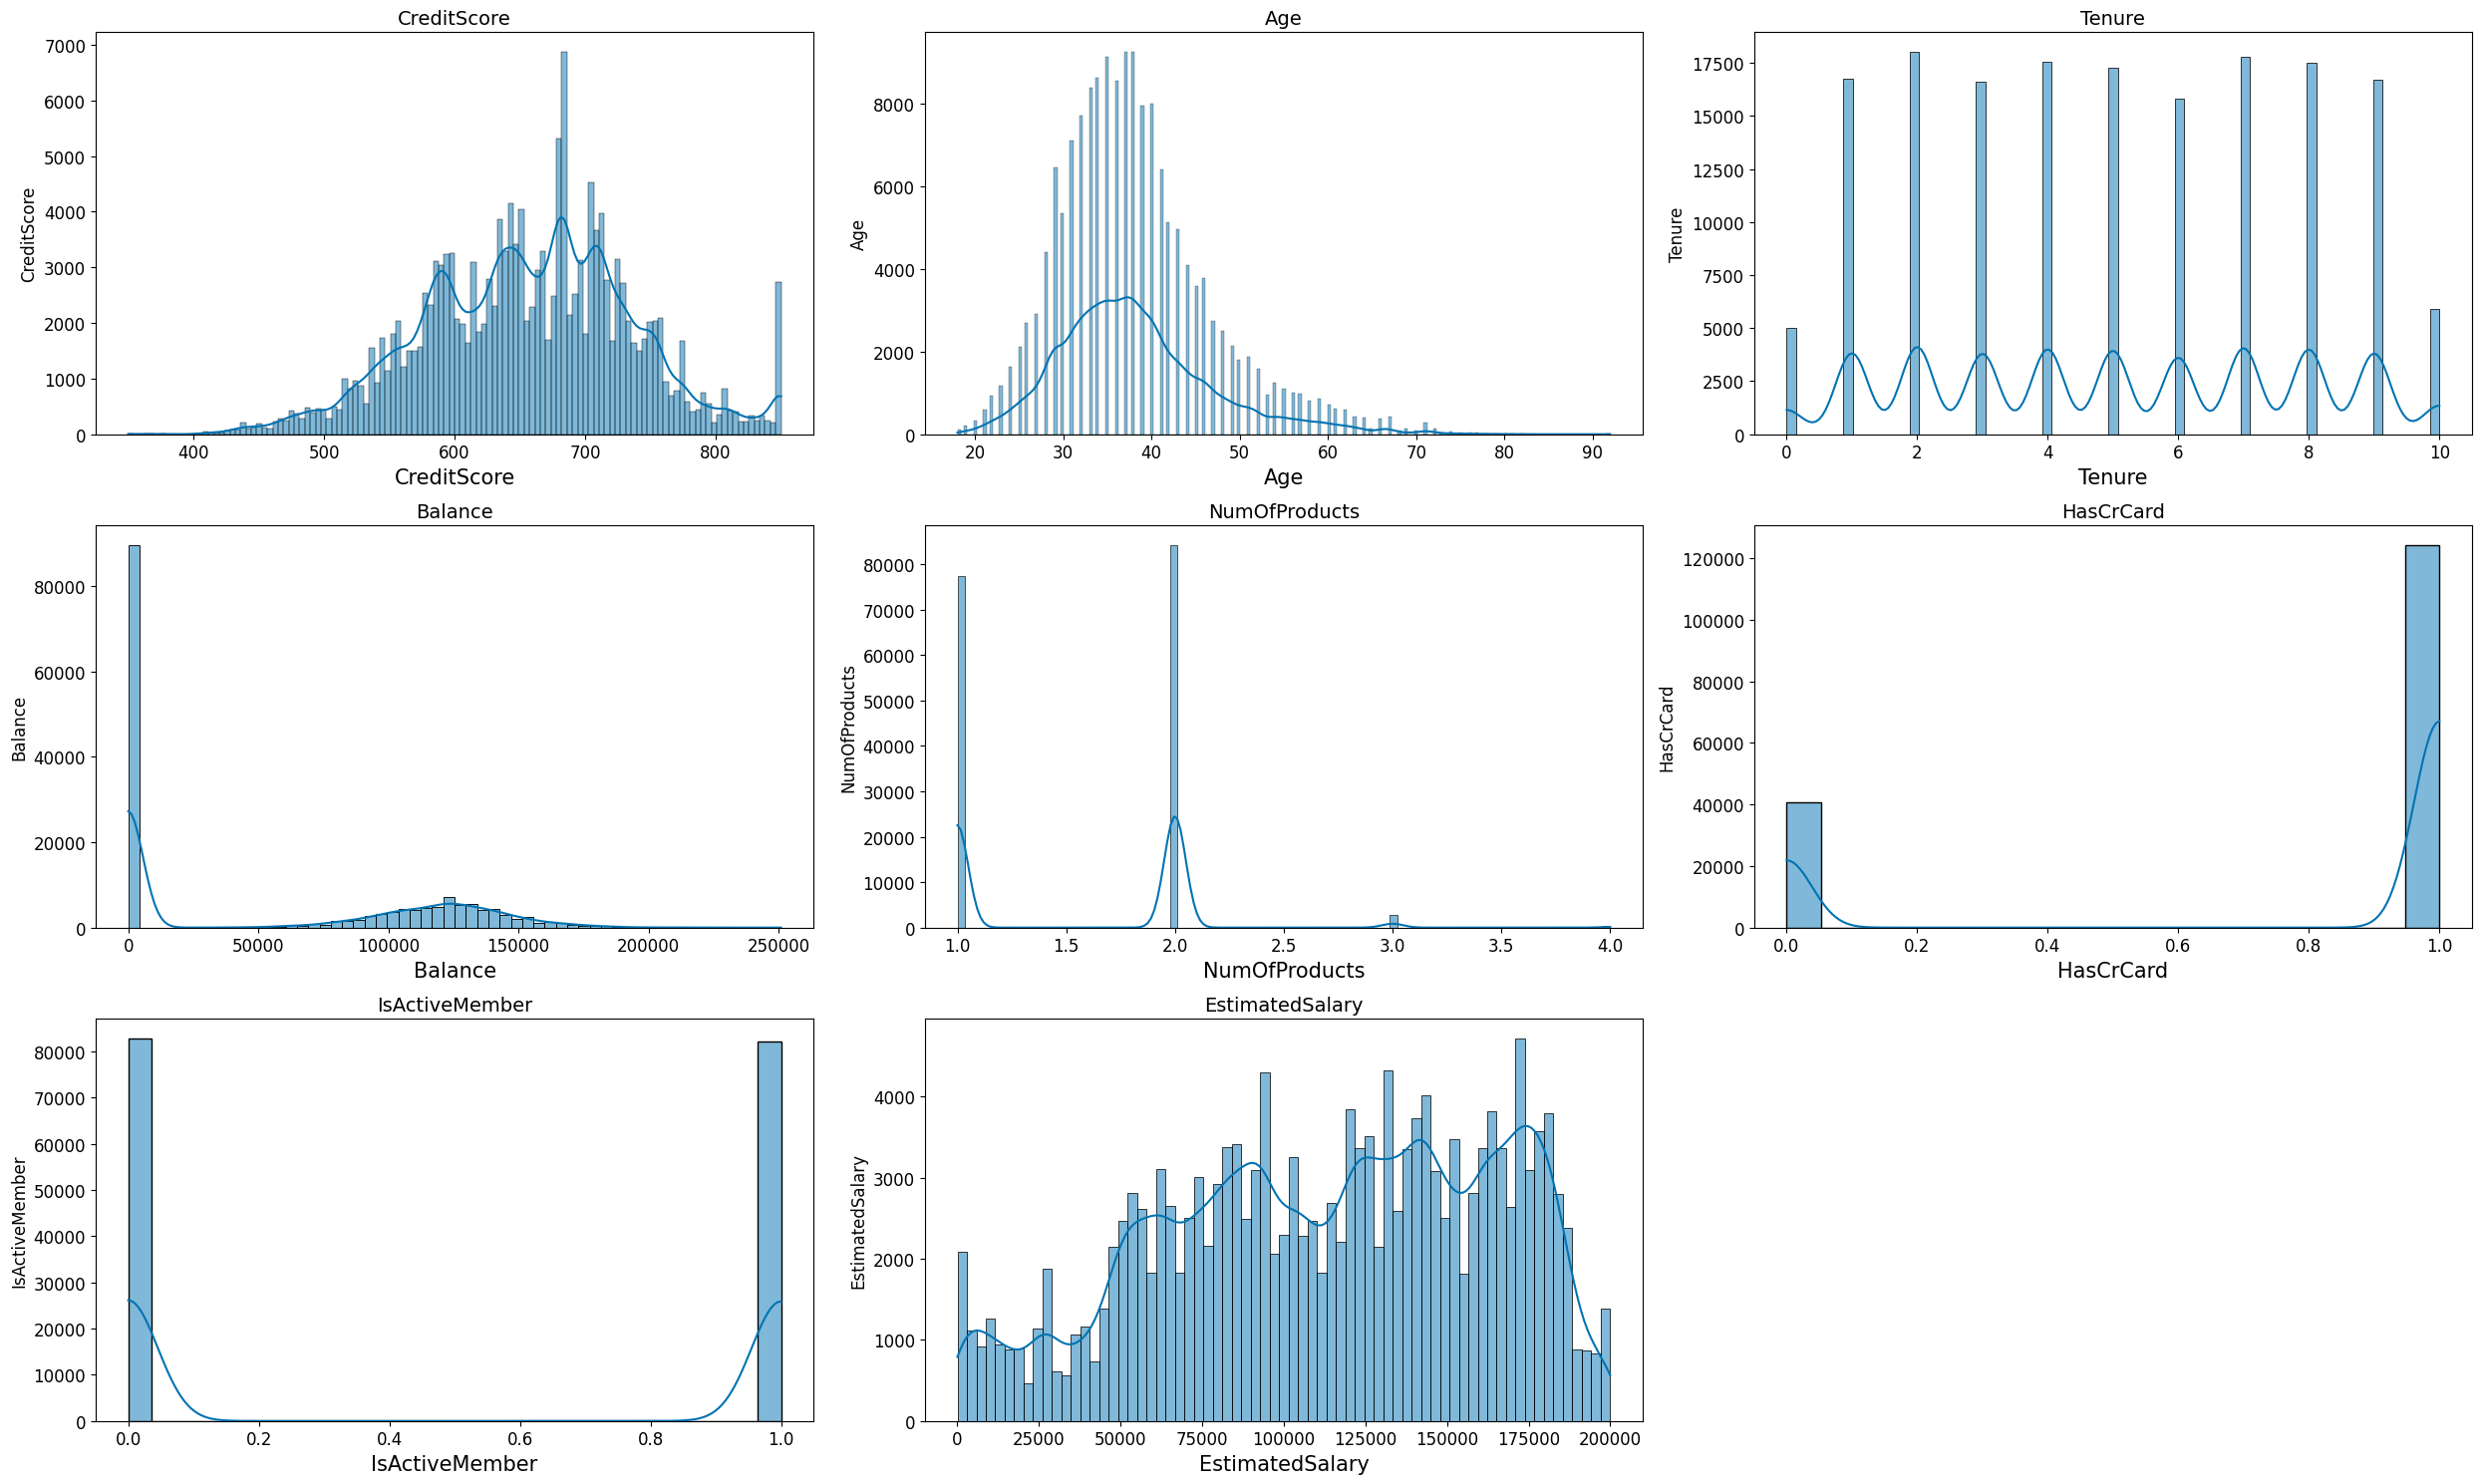

In [33]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# defining the figure size
plt.figure(figsize=(25, 15))

# making for loop for subplots
for col in range(len(numeric_cols.columns)):
    # defining subplot
    plt.subplot(3, 3, col+1)
    # plotting boxplot
    sns.histplot(x=df[numeric_cols.columns[col]], kde=True)
    # Increase title font size
    plt.title(numeric_cols.columns[col], fontsize=14)  
    # Increase y-axis label font size
    plt.ylabel(numeric_cols.columns[col], fontsize=12)  
    # Increase Y-axis label font size
    plt.xlabel(numeric_cols.columns[col], fontsize=15)
     # Increase tick size
    plt.tick_params(axis='both', which='major', labelsize=12) 
# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

---
- As from the histogram we can see that `CreditScore` is right skewed and `Age` column is left skewed.

---

### **Removing Outliers**

In [34]:
# list of column which have outliers
col = ['CreditScore', 'Age']

# for loop for replacing outliers
for i in col:
    # Find Q1 and Q3
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    # Find IQR
    iqr = q3 - q1
    # Find lower and upper limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    # Find median of the column
    median = df[i].median()
    
    # Replace outliers with median
    df[i] = np.where((df[i] < lower_limit) | (df[i] > upper_limit), median, df[i])

---
- Removed the outliers in the `CreditScore` and `Age` column and replaced them with the median value.
---

### **Standardization**

In [35]:
# standardizing the numeric columns in the dataset
scaler = StandardScaler()

# defining the numeric columns
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# standardizing the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


----
- Standardized the `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `EstimatedSalary` column.
- Standardization is a technique used to normalize the data by centering it around the mean and scaling it by the standard deviation.
---


### **Label Encoding**

In [36]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Geography']=le.fit_transform(df['Geography'])


----
- Label encoded the `Gender` and `Geography` column.
- Label encoding is a technique used to convert categorical variables into numerical variables.
----

### **Defining Features and Labels**

In [37]:
# Select the Features and labels
X=df.drop(['Exited', 'id', 'CustomerId', 'Surname'], axis=1)
y=df['Exited']

### **Train Test Split**

In [38]:
# split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
# trainig size
print(f'The training size is: {X_train.shape}')
# testing size
print(f'The testing size is: {X_test.shape}')

The training size is: (132027, 10)
The testing size is: (33007, 10)


### **Deep Network Model**

In [ ]:
# Create a Deep Network Model
model=tf.keras.models.Sequential([
    # input layer
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    # hidden layers 1 
    tf.keras.layers.Dense(32, activation='relu'),
    # hidden layers 2
    tf.keras.layers.Dense(16, activation='relu'),
    # hidden layers 3
    tf.keras.layers.Dense(8, activation='relu'),
    # output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    # training data
    X_train, y_train,
    # validation data
    validation_data=(X_test, y_test),
    # number of epochs
    epochs=100,
    # batch size
    batch_size=15,
    # callbacks
    callbacks=[early_stopping],
    # verbose
    verbose=1
)


Epoch 1/100
8802/8802 [==============================] - 92s 10ms/step - loss: 0.3454 - accuracy: 0.8530 - val_loss: 0.3339 - val_accuracy: 0.8583
Epoch 2/100
8802/8802 [==============================] - 88s 10ms/step - loss: 0.3348 - accuracy: 0.8592 - val_loss: 0.3301 - val_accuracy: 0.8589
Epoch 3/100
8802/8802 [==============================] - 90s 10ms/step - loss: 0.3331 - accuracy: 0.8600 - val_loss: 0.3286 - val_accuracy: 0.8611
Epoch 4/100
8802/8802 [==============================] - 88s 10ms/step - loss: 0.3324 - accuracy: 0.8594 - val_loss: 0.3287 - val_accuracy: 0.8606
Epoch 5/100
8802/8802 [==============================] - 89s 10ms/step - loss: 0.3318 - accuracy: 0.8600 - val_loss: 0.3284 - val_accuracy: 0.8609
Epoch 6/100
8802/8802 [==============================] - 88s 10ms/step - loss: 0.3311 - accuracy: 0.8603 - val_loss: 0.3293 - val_accuracy: 0.8608
Epoch 7/100
8802/8802 [==============================] - 88s 10ms/step - loss: 0.3308 - accuracy: 0.8609 - val_loss: 0

### **Model Summary**

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


### 🧠 Model Summary

| Layer     | Type                  | Output Shape | Parameters | Description                                   |
|-----------|-----------------------|--------------|------------|-----------------------------------------------|
| `dense`   | Dense (Fully Connected) | (None, 64)   | **704**     | First layer with 64 neurons and input size of 10 → `10 * 64 + 64` |
| `dense_1` | Dense                 | (None, 32)   | **2080**    | `64 * 32 + 32`                                |
| `dense_2` | Dense                 | (None, 16)   | **528**     | `32 * 16 + 16`                                |
| `dense_3` | Dense                 | (None, 8)    | **136**     | `16 * 8 + 8`                                  |
| `dense_4` | Dense                 | (None, 1)    | **9**       | `8 * 1 + 1` (Output layer)                    |

---

**Total Trainable Parameters:** `3,457`  
**Non-trainable Parameters:** `0`

---

Each dense layer's parameters are calculated as:  
**(input units × output units) + output bias**

Example for first layer:  
`(10 × 64) + 64 = 704`


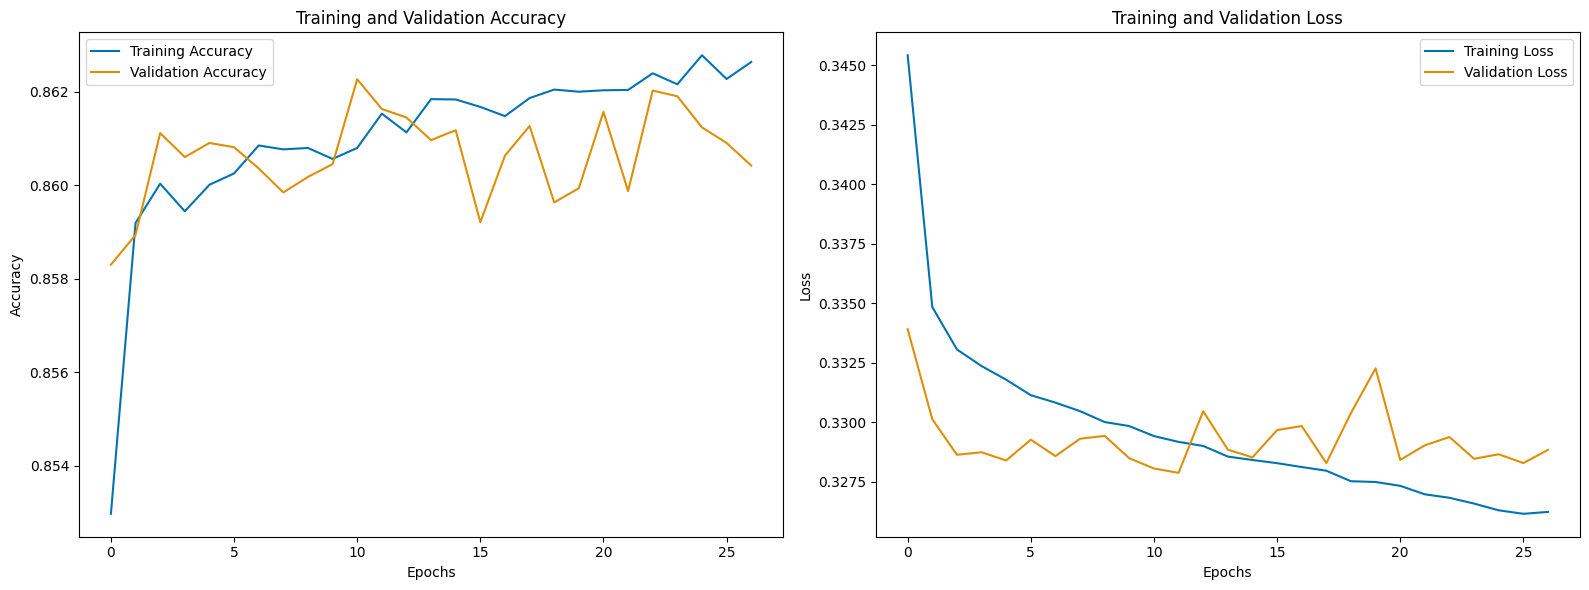

In [ ]:
# plot the accuracy and validation accuracy

# define the figure size
fig,ax=plt.subplots(figsize=(8,6))
# plot the Training and Validation accuracy
ax.plot(history.history['accuracy'], label='Training accuracy')
# plot the Validation accuracy
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
# set the x-axis label
ax.set_xlabel('Epochs')
# set the y-axis label
ax.set_ylabel('Accuracy')
# set the title of the plot
ax.set_title('Training and Validation Accuracy')
# add the legend to the plot
ax.legend()
plt.show()
# plot the Training and Validation loss
fig,ax=plt.subplots(figsize=(8,6))
# plot the Training Loss
ax.plot(history.history['loss'], label='Training Loss')
# plot the Validation Loss
ax.plot(history.history['val_loss'], label='Validation Loss')
# set the x-axis label
ax.set_xlabel('Epochs')
# set the y-axis label
ax.set_ylabel('Loss')
# set the title of the plot
ax.set_title('Training and Validation Loss')
# add the legend to the plot
ax.legend()
plt.show()

### **Model Performance Visualization**

#### Training and Validation Accuracy
The plot on the left shows the accuracy over epochs for both the training and validation datasets.

- **Training Accuracy** gradually improves from around **85.3% to 86.2%**, indicating that the model is learning effectively.
- **Validation Accuracy** fluctuates slightly but remains close to training accuracy, indicating **no overfitting**.
- Both accuracies converge around the same point, suggesting good generalization to unseen data.

#### Training and Validation Loss
The plot on the right presents the model's loss over time.

- **Training Loss** steadily decreases, which is expected as the model learns.
- **Validation Loss** also decreases initially but shows minor fluctuations after epoch 10, indicating small changes in performance across epochs.
- Despite the fluctuations, validation loss remains close to training loss, supporting the model’s **stability**.

> These visualizations confirm that the model is performing consistently on both training and validation sets without signs of overfitting or underfitting.
